<a href="https://colab.research.google.com/github/codemist04/Exploratory-Data-Analysis-EDA--Task-5/blob/main/Exploratory_Data_Analysis_(EDA)_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Loading dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")  # Change path if needed

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Dataset overview
print("\nDataset Info:")
print(df.info())

print("\nDataset Shape:", df.shape)

print("\nSummary Statistics:")
print(df.describe(include='all'))

# Value counts for categorical columns
for col in df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Shape: (891, 12)

Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         N

In [57]:
#Printing the Missing Values
print("\nMissing Values Count:")
df.isnull().sum()


Missing Values Count:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
df.drop(columns=['Cabin'], errors='ignore', inplace=True)
#Handling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], errors='ignore', inplace=True)


In [59]:
#checking if there are null values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


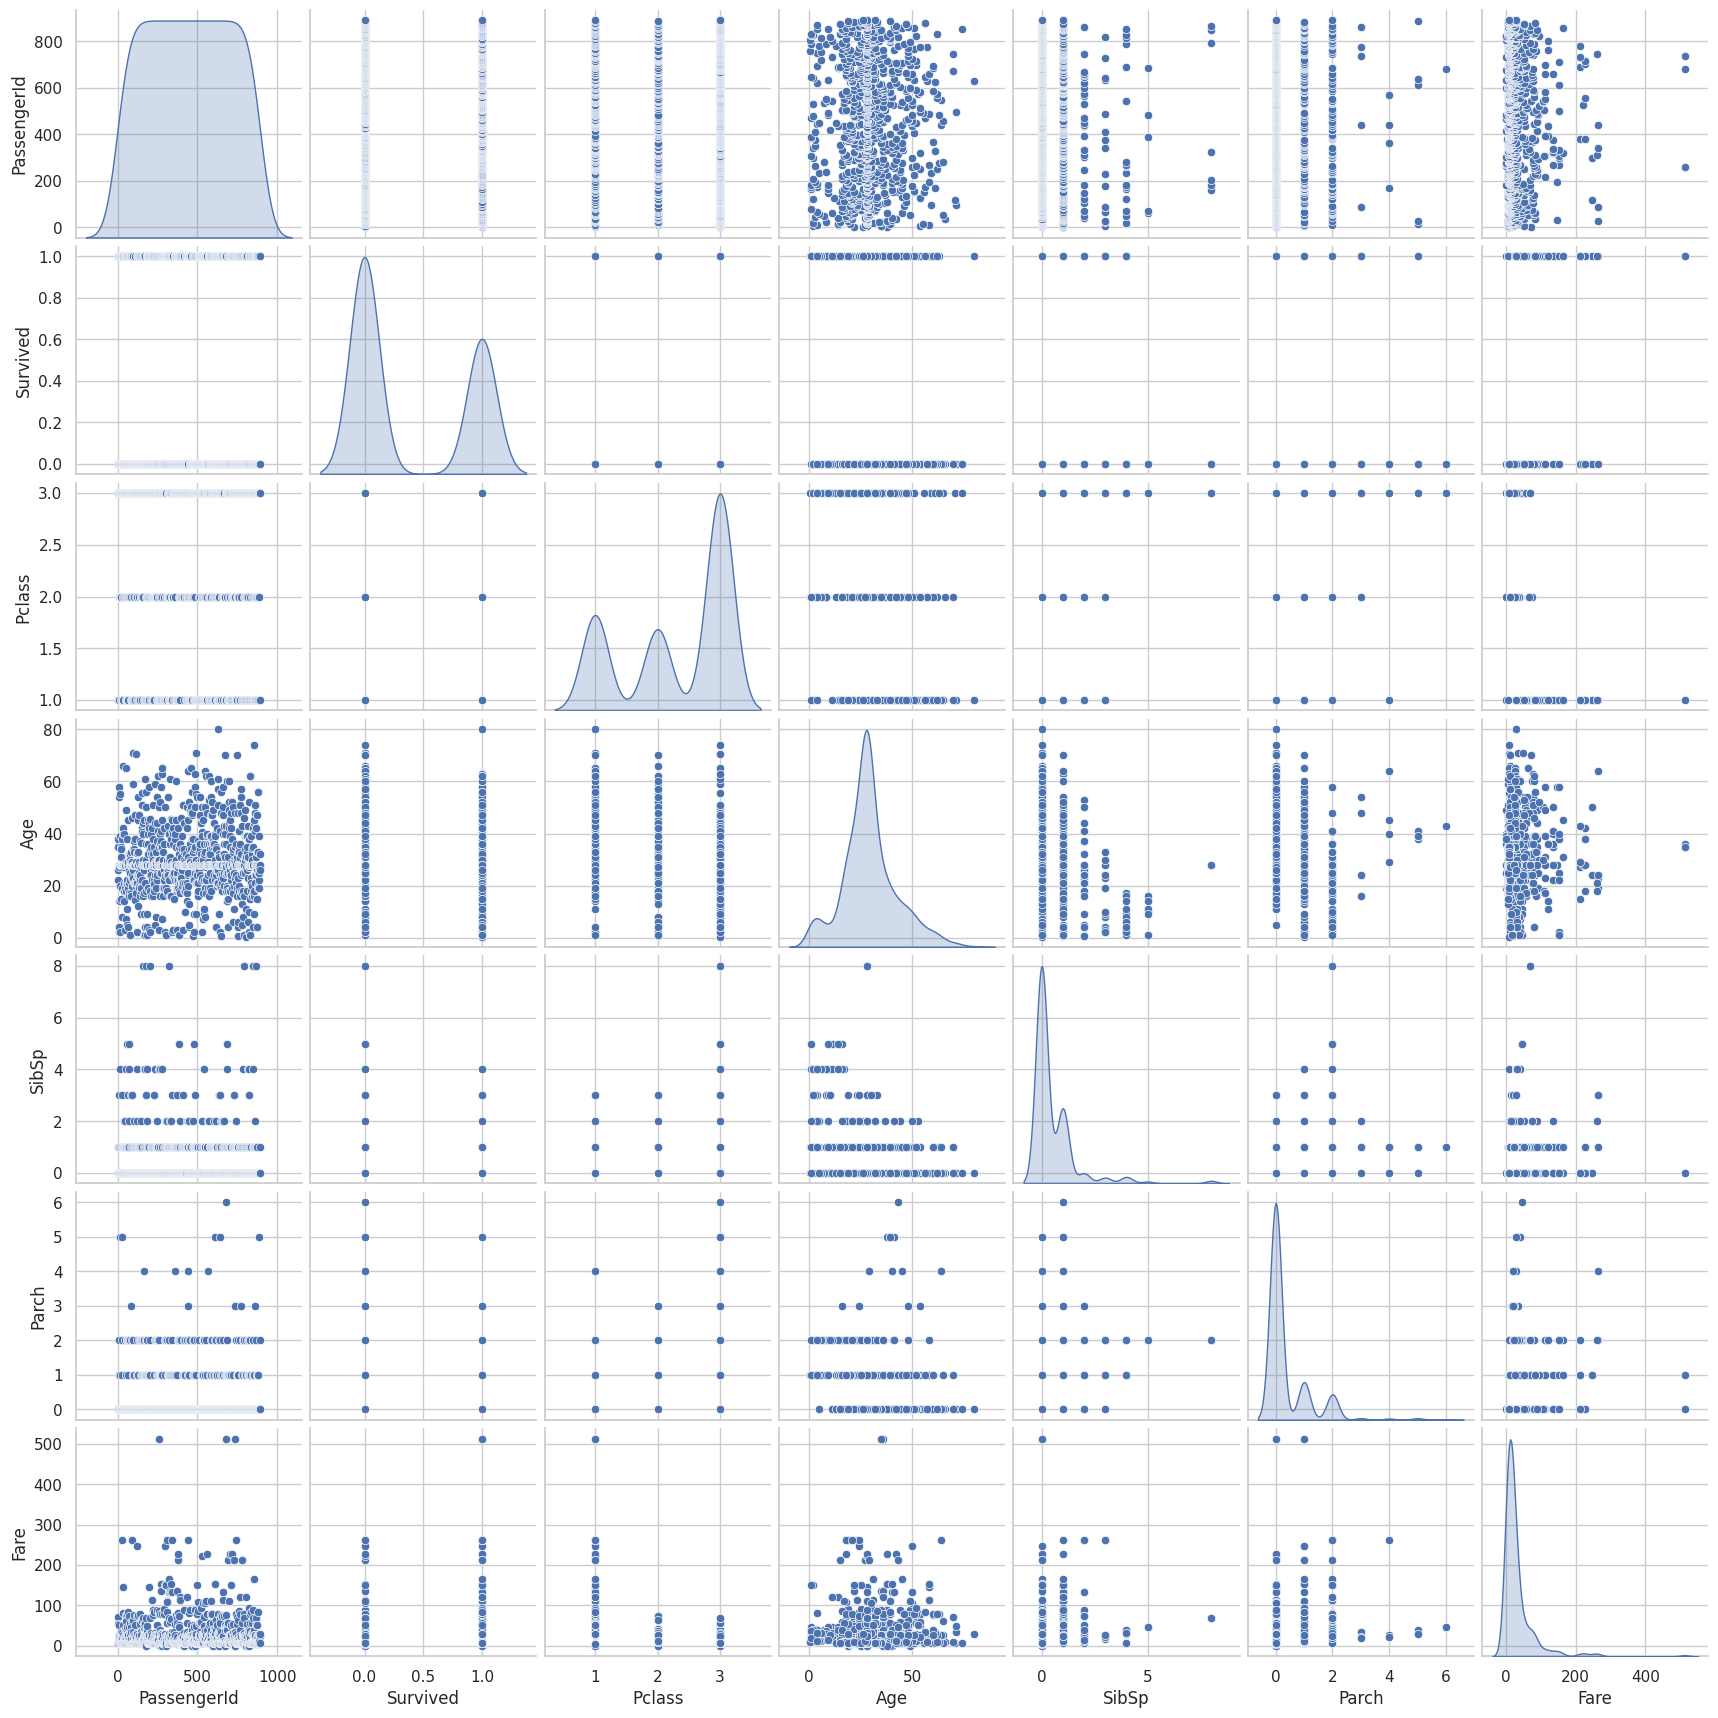

In [60]:
#Pair plot
sns.pairplot(df, diag_kind='kde')
plt.show()

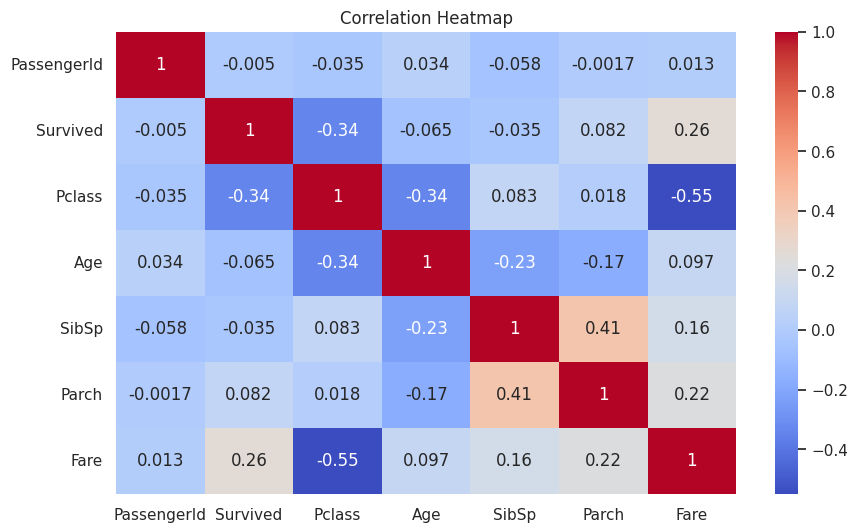

In [38]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


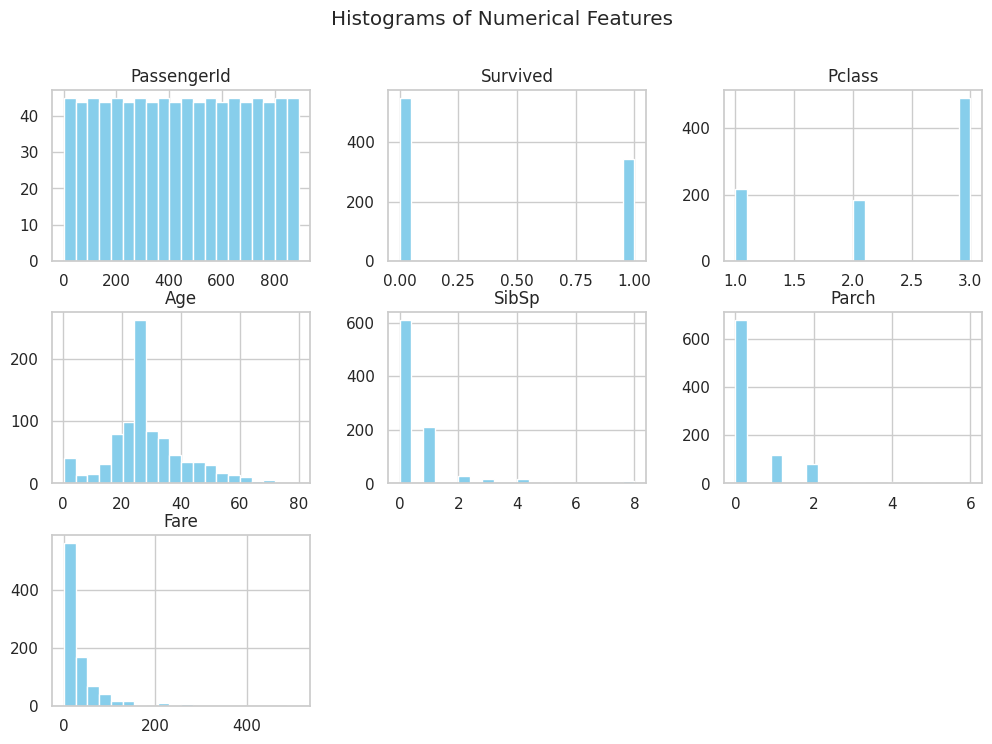

In [43]:
# Step 7: Histograms for numeric columns
df.hist(figsize=(12,8), bins=20, color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()


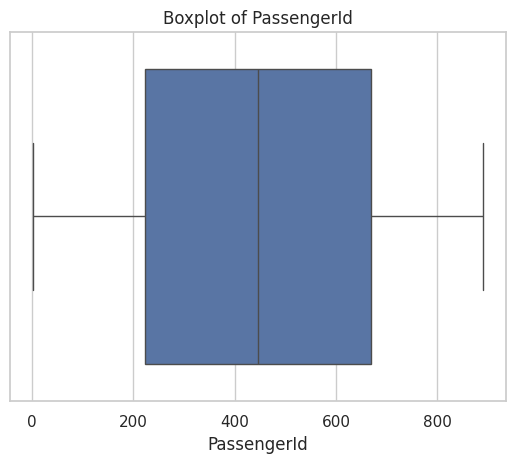

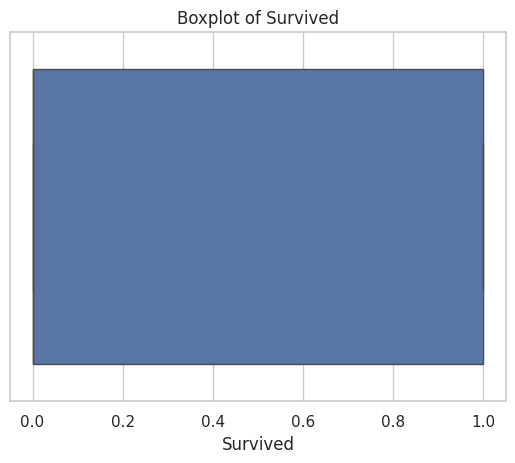

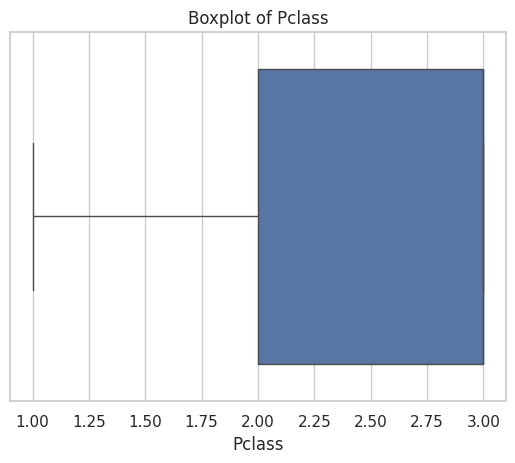

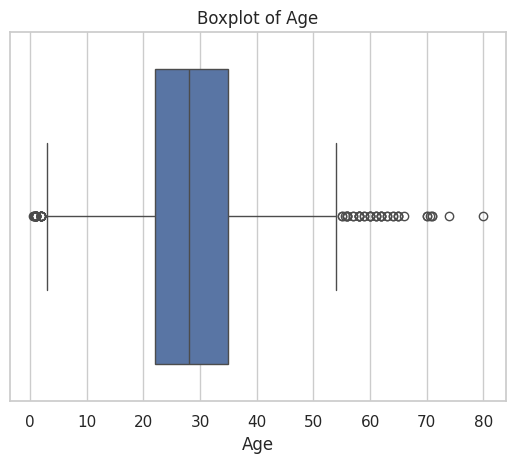

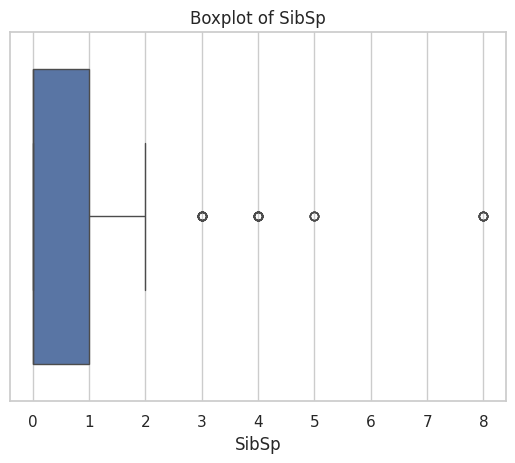

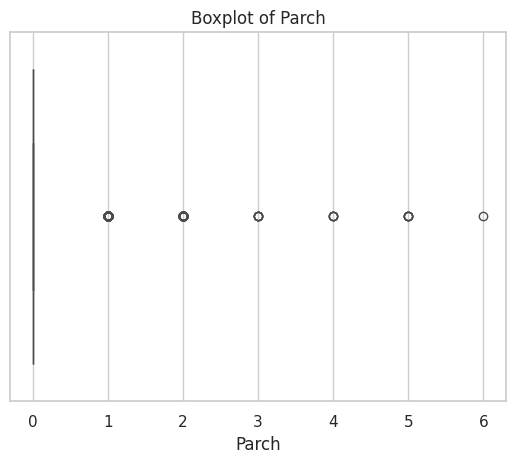

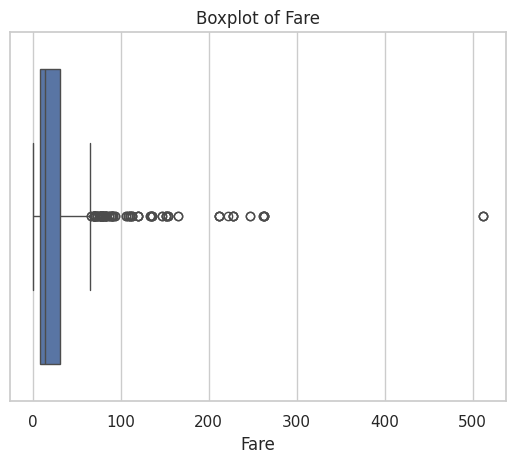

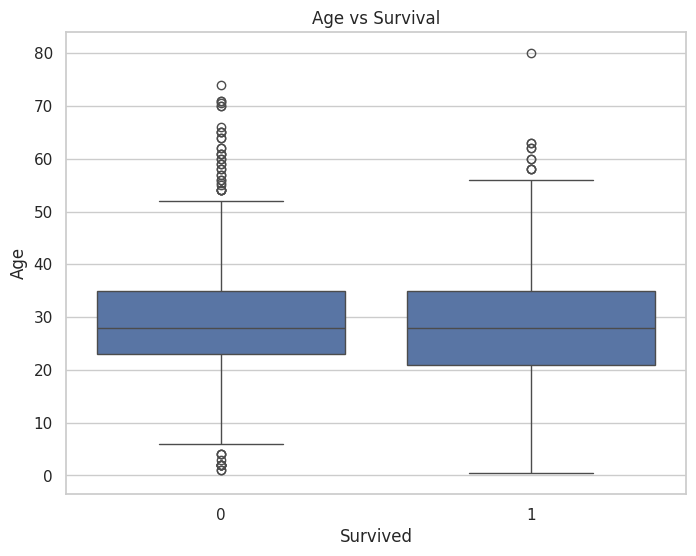

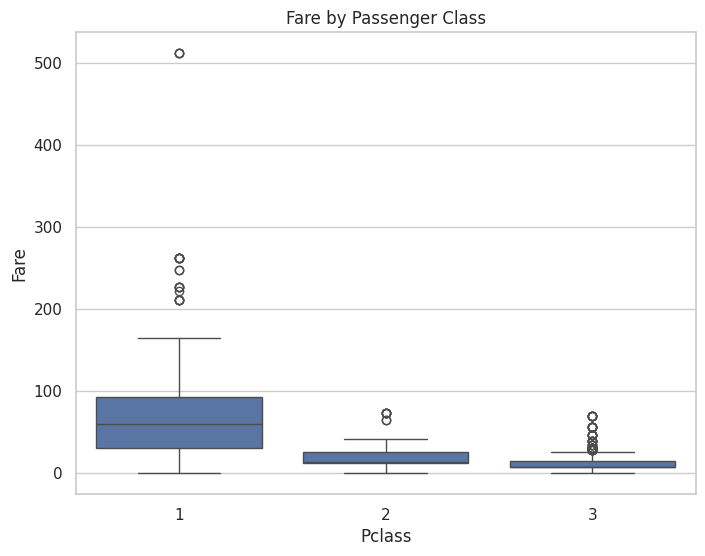

In [47]:
# Boxplots for outlier detection
for col in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Step 8: Boxplots for numerical vs categorical
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()



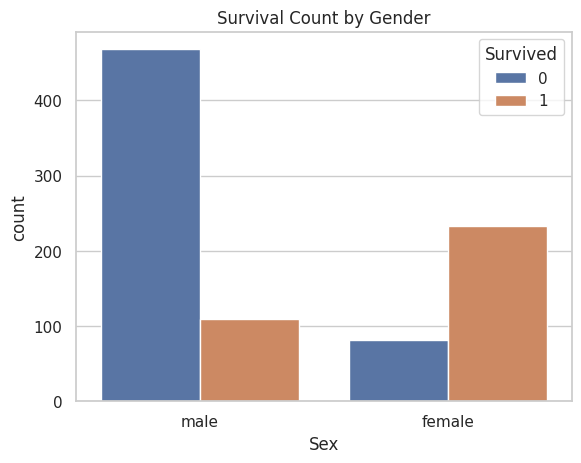

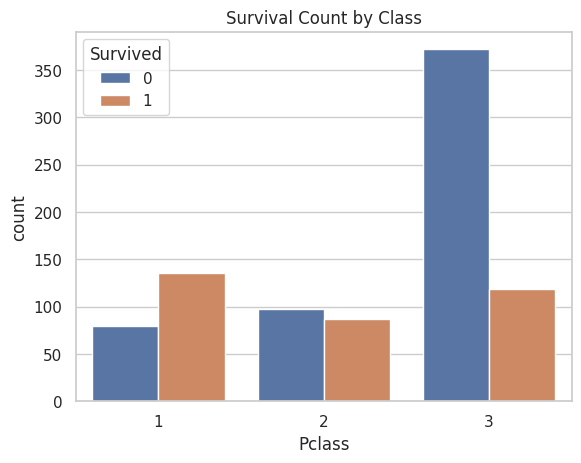

In [50]:
# Example: Survival rate by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.show()

# Example: Survival rate by class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Class")
plt.show()




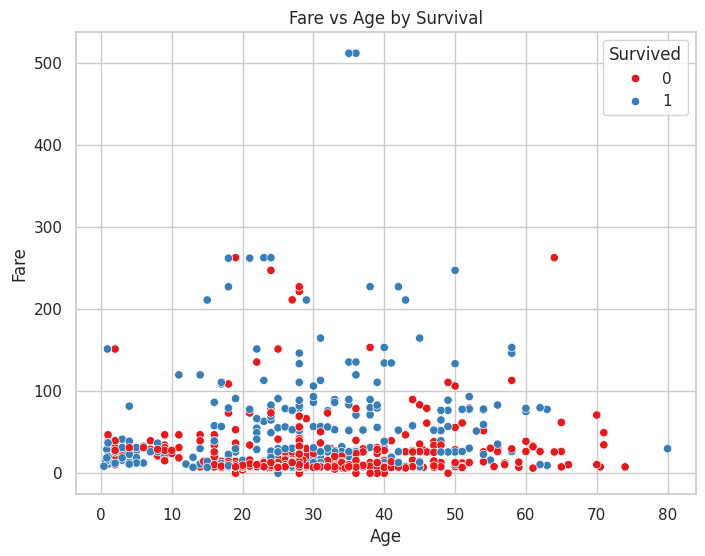

In [49]:
# Step 9: Example scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title("Fare vs Age by Survival")
plt.show()


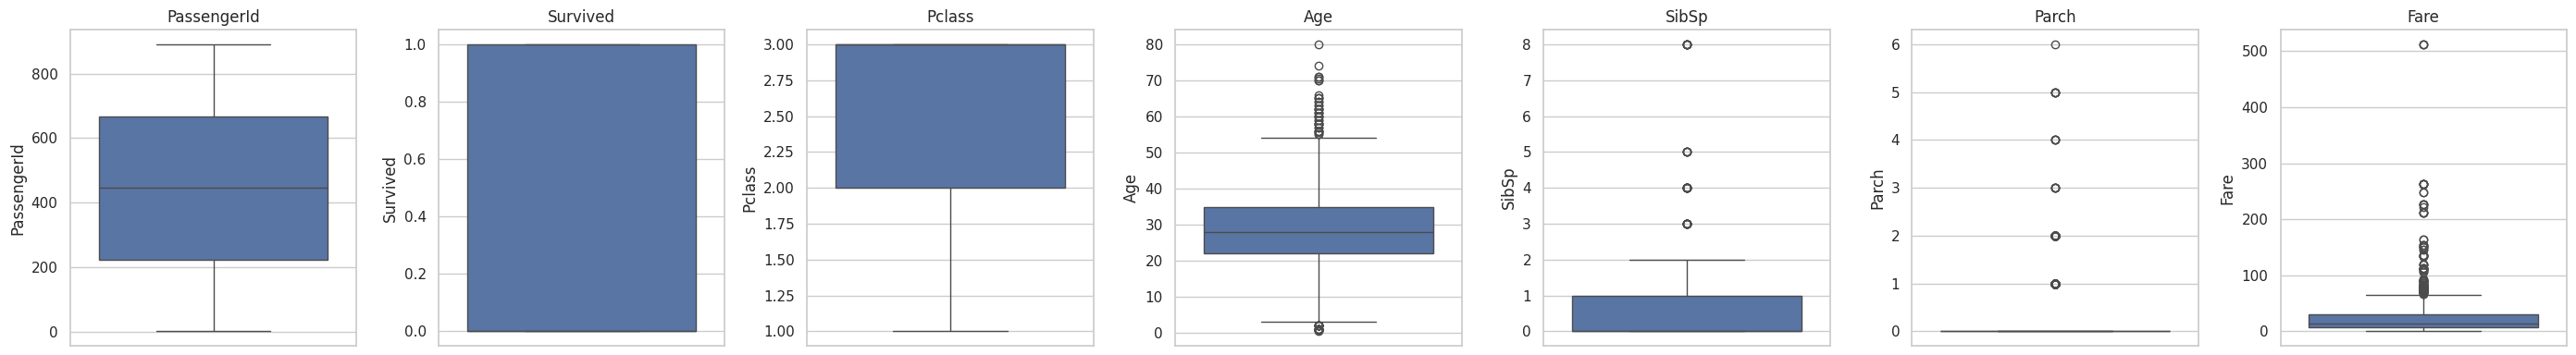

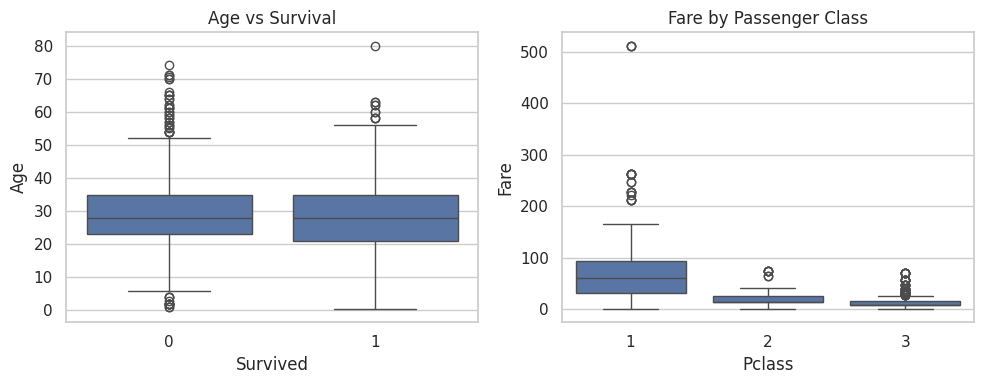

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Number of numeric columns
n = len(numeric_cols)

# Create subplots: adjust rows/cols depending on number of plots
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(4*n, 4))  # width per plot = 4

# Plot each boxplot in its own subplot
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)   # using y=col for vertical plot
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

# Now for the categorical vs numerical boxplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title("Age vs Survival")

sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[1])
axes[1].set_title("Fare by Passenger Class")

plt.tight_layout()
plt.show()
